In [219]:
import pandas as pd
import numpy as np
import warnings  # >>> 3shna lw 3awz ashyl warning zahr fe cell wla haga
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [220]:
df = pd.read_csv(r"/content/HousingData.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [221]:
warnings.filterwarnings("ignore")

x = df.drop(["MEDV"],1)
y = df["MEDV"]

In [222]:
null_columns = x.columns[x.isnull().any()]
null_rows = x[x.isnull().any(axis=1)]

In [223]:
x = x.dropna()
y = y.drop(null_rows.index)  # Remove corresponding target values

In [224]:
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [225]:
x.fillna(x.mean(), inplace=True)  # Impute with mean

In [226]:
scaler = StandardScaler()
columns = x.columns    # >> 3shan lma b3ml fit transform byzharly arrays w msh bkon 3arf esm elcolumns
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns = columns)

In [227]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
print("x_train shape ",x_train.shape)
print("y_train shape ",y_train.shape)
print("x_test shape ",x_test.shape)
print("y_test shape ",y_test.shape)

x_train shape  (275, 13)
y_train shape  (275,)
x_test shape  (119, 13)
y_test shape  (119,)


In [228]:
class Neural_Network:
    def __init__(self,input_neurons,hidden_neurons,output_neurons,learning_rate):
        self.weights_input_hidden = np.random.uniform(-0.5,0.5,(hidden_neurons,input_neurons))
        self.weights_hidden_output = np.random.uniform(-0.5,0.5,(output_neurons,hidden_neurons))
        self.lr = learning_rate


    def activition(self,x):
        return 1/(1+np.exp(-x))



    # in NN we deal with data in 2D and Transpose to match with the weights shape
    def forward(self,inputs):
        self.inputs = np.array(inputs,ndmin=2).T

        hidden_inputs = np.dot(self.weights_input_hidden,self.inputs)
        self.hidden_outputs = self.activition(hidden_inputs)

        final_inputs = np.dot(self.weights_hidden_output,self.hidden_outputs)
        final_outputs = final_inputs

        return final_outputs

    def backward(self,target,predictions):
        output_error = target - predictions
        hidden_grad = np.dot(self.weights_hidden_output.T,output_error) * (self.hidden_outputs* (1-self.hidden_outputs))  #>> transpose 3shan rag3 mn wara l odam

        self.weights_hidden_output +=(self.lr) * output_error *self.hidden_outputs.T
        self.weights_input_hidden += (self.lr) * hidden_grad * self.inputs.T

    def MSE(self,target,predictions):
        return (np.sum(target - predictions)**2) / len(target)

In [229]:
x_train.shape[1]

13

In [230]:
input_neurons = x_train.shape[1]
hidden_neurons = 32  #>> random
output_neurons = 1   #>> 3shan eloutput y7komni b one value as predicted value
learning_rate = 0.01
epochs = 1000
model = Neural_Network(input_neurons,hidden_neurons,output_neurons,learning_rate)

In [231]:
import sys
losses = {"train":[],"valid":[]}

for epoch in range(epochs):
    batch = np.random.choice(x_train.index,size = 8)
    for record,target in zip (x_train.loc[batch].values,y_train.loc[batch].values):
        preds = model.forward(record)
        model.backward(target,preds)
    train_loss = model.MSE(y_train,model.forward(x_train)[0])
    valid_loss = model.MSE(y_test,model.forward(x_test)[0])


    sys.stdout.write("\r PROGRES : " + str(100*epoch / float(epochs))[:4]  + "%...Training loss:"+str(train_loss)[:5]+"%..validition loss: "+str(valid_loss)[:5])
    losses["train"].append(train_loss)
    losses["valid"].append(valid_loss)

 PROGRES : 99.9%...Training loss:131.9%..validition loss: 5.057

In [232]:
y_train.shape

(275,)

In [233]:
result =  pd.DataFrame()
result["preds"] = model.forward(x_test)[0]
result["Actual"] = y_test.values
result

,preds,Actual
0,13.569162,17.2
1,20.785852,20.8
2,25.515299,21.4
3,20.623191,21.7
4,16.081667,17.5
...,...,...
114,20.684821,21.4
115,15.327941,13.3
116,29.869651,24.0
117,35.169949,46.0


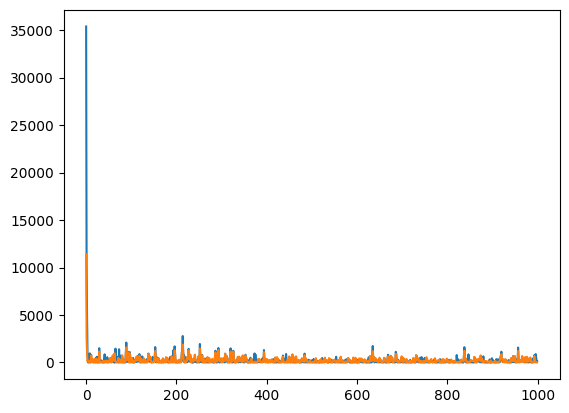

In [234]:
import matplotlib.pyplot as plt
plt.plot(losses["train"],label="Training loss")
plt.plot(losses["valid"],label="validition loss")
plt.show()

In [239]:
model.forward(x_train).shape

(1, 275)